In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from utils.linear_approximator import linapx
from utils.radial_basis_approximator import rbapx

%load_ext autoreload
%autoreload 2

# Task 1: Approximating functions

## First part

In [2]:
A = np.loadtxt("data/linear_function_data.txt")

#### Check code: utils/linear_approximator.py

In [3]:
task1part1 = linapx(A[:, 0], A[:, 1], add_bias=True)
task1part1.coefficient

array([2.64347195e-07, 7.50000229e-01])

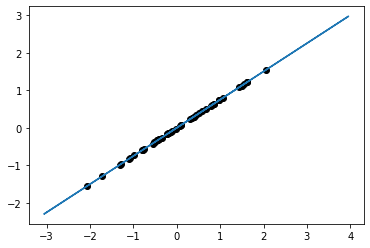

In [4]:
yhat = task1part1.predict(add_bias=True)
plt.plot(A[::20, 0], A[::20, 1], "o", c="black")
plt.plot(A[:, 0], yhat)
plt.show()

##### Comments:
Every 20 true data points are ploted as black dots. The estimated linear function is the blue line, which is $y = 0.75x + 0$

### Why it is not good to use radial basis approximation on (A)?

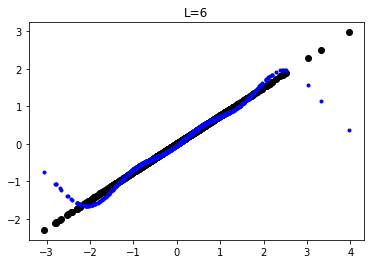

In [20]:
L=6
task1test = rbapx(A[:,0], A[:,1])
task1test.fit(L=L)
yhat = task1test.predict()
plt.plot(A[:, 0], A[:, 1], "o", c="black")
plt.plot(A[:, 0], yhat, ".", c="blue")
plt.title("L=%d"%L)
plt.show()

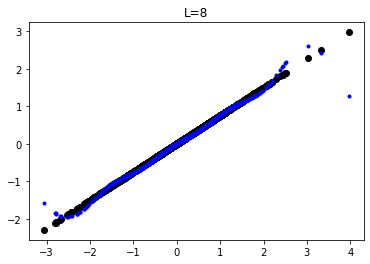

In [21]:
L=8
task1test = rbapx(A[:,0], A[:,1])
task1test.fit(L=L)
yhat = task1test.predict()
plt.plot(A[:, 0], A[:, 1], "o", c="black")
plt.plot(A[:, 0], yhat, ".", c="blue")
plt.title("L=%d"%L)
plt.show()

## Second part

In [5]:
B = np.loadtxt("data/nonlinear_function_data.txt")
task1part2 = linapx(B[:,0], B[:,1], add_bias=True)
task1part2.coefficient

array([0.11114247, 0.02873498])

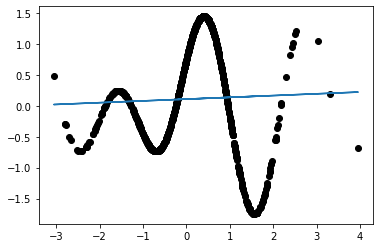

In [6]:
yhat = task1part2.predict(add_bias=True)
plt.plot(B[:, 0], B[:, 1], "o", c="black")
plt.plot(B[:, 0], yhat)
plt.show()

##### Comments:
The estimated linear function is the blue line, which is $y = 0.0287x + 0.111$

## Third part

##### $\epsilon=\sqrt{2}, L=10$ gives good approximation

#### Check codes: utils/radial_basis_approximator.py

In [7]:
B = np.loadtxt("data/nonlinear_function_data.txt")
task1part3 = rbapx(B[:, 0], B[:, 1])
task1part3.fit(L=10, e=2**0.5)

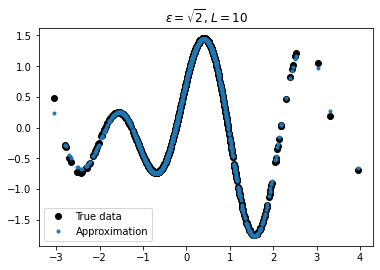

In [8]:
yhat = task1part3.predict()
plt.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
plt.plot(B[:, 0], yhat, ".", label="Approximation")
plt.title(r"$\epsilon=\sqrt{2}, L=10$")
plt.legend()
plt.show()

### Examine parameters

#### $\epsilon$

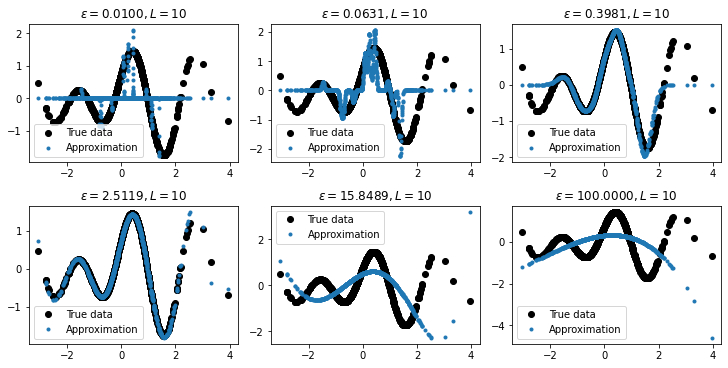

In [9]:
L=10
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
for i, e in enumerate(np.logspace(-2, 2, 6)):
    task1part3.fit(L=L, e=e)
    yhat = task1part3.predict()

    ax = fig.add_subplot(spec[i//3, i%3])
    ax.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
    ax.plot(B[:, 0], yhat, ".", label="Approximation")
    ax.legend()
    ax.title.set_text(r"$\epsilon=%.4f, L=%d$"%(e, L))
    

plt.show()

### L with a bad e

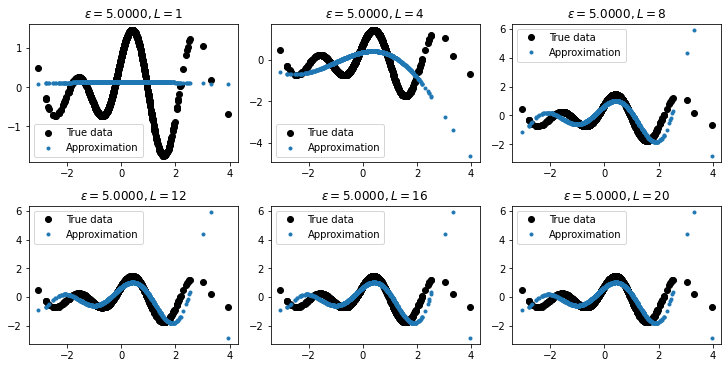

In [10]:
e = 5
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
for i, L in enumerate(np.linspace(1, 20, 6)):
    task1part3.fit(L=int(L), e=e)
    yhat = task1part3.predict()

    ax = fig.add_subplot(spec[i//3, i%3])
    ax.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
    ax.plot(B[:, 0], yhat, ".", label="Approximation")
    ax.legend()
    ax.title.set_text(r"$\epsilon=%.4f, L=%d$"%(e, L))
    
plt.show()

### L with an appropriate e

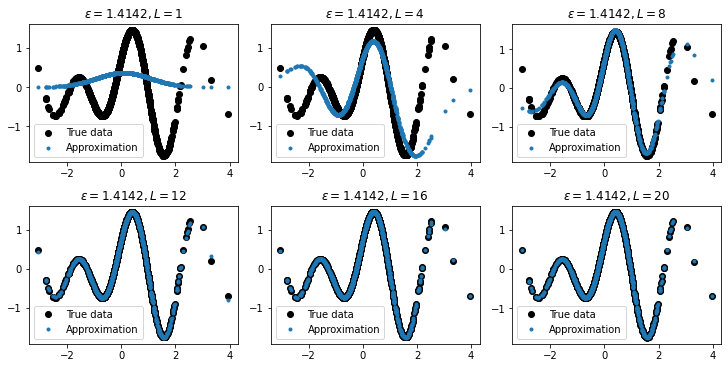

In [11]:
e = 2**0.5
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
for i, L in enumerate(np.linspace(1, 20, 6)):
    task1part3.fit(L=int(L), e=e)
    yhat = task1part3.predict()

    ax = fig.add_subplot(spec[i//3, i%3])
    ax.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
    ax.plot(B[:, 0], yhat, ".", label="Approximation")
    ax.legend()
    ax.title.set_text(r"$\epsilon=%.4f, L=%d$"%(e, L))
    
plt.show()